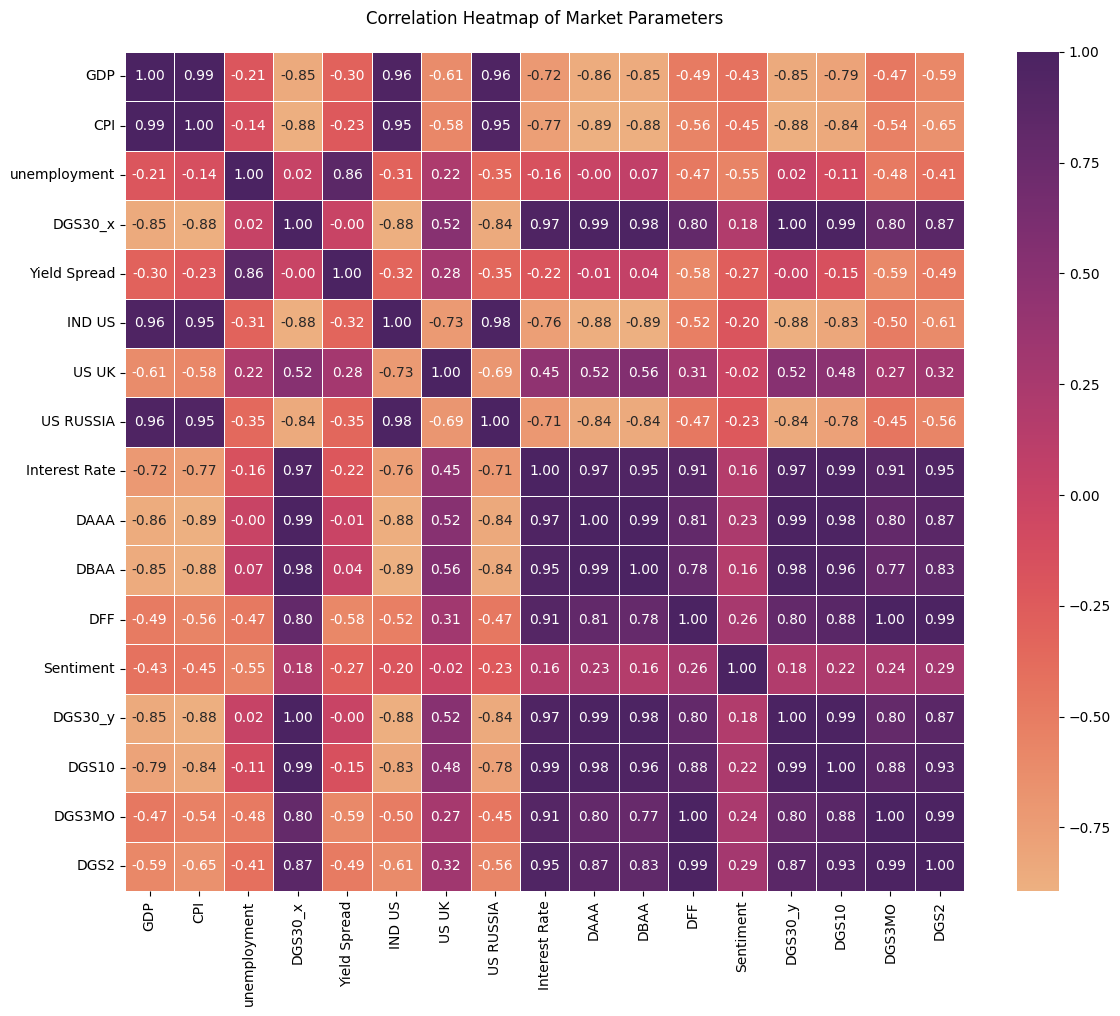

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("..//final//us_market_data_hourly_with_inflation_modified.csv")

# Select specific columns for correlation
selected_columns = [
       'GDP',	'CPI','unemployment', 'DGS30_x','Yield Spread',	'IND US','US UK','US RUSSIA','Interest Rate','DAAA',	'DBAA',	'DFF','Sentiment',	'DGS30_y',	'DGS10',	'DGS3MO',	'DGS2'	
]

# Create correlation matrix
corr_matrix = df[selected_columns].corr()
X=df.drop('inflation_rate',axis=1)
y=df['inflation_rate']

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='flare',
            fmt='.2f',
            square=True,
            linewidths=0.5,
            annot_kws={"size": 10})

plt.title('Correlation Heatmap of Market Parameters', pad=20)
plt.tight_layout()
plt.savefig('market_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

used to prevent overfitting we did train test split


In [5]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y ,
    test_size=0.3, 
    random_state=0)    
X_train.shape, X_test.shape

((214771, 18), (92046, 18))

In [6]:
def correlation(dataset,threshold):
    col_corr = set() # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [7]:
corr_features = correlation(df[selected_columns], 0.7)
len(set(corr_features))

14

In [8]:
corr_features

{'CPI',
 'DAAA',
 'DBAA',
 'DFF',
 'DGS10',
 'DGS2',
 'DGS30_x',
 'DGS30_y',
 'DGS3MO',
 'IND US',
 'Interest Rate',
 'US RUSSIA',
 'US UK',
 'Yield Spread'}

In [9]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,observation_date,GDP,unemployment,Sentiment
244639,2017-11-28 07:00:00,16725.797374,5.140156,91.464865
253281,2018-11-23 09:00:00,17571.613989,5.356020,88.955428
193061,2012-01-10 05:00:00,15495.260034,7.389334,77.030042
74400,1998-06-28 00:00:00,12523.464223,4.800328,94.228348
240812,2017-06-21 20:00:00,16508.906775,5.063567,92.021663
...,...,...,...,...
40045,1994-07-27 13:00:00,9956.672169,6.327553,87.431943
184152,2011-01-04 00:00:00,14859.252307,7.495301,76.093334
62280,1997-02-08 00:00:00,12119.052395,5.102669,92.908413
66882,1997-08-18 18:00:00,12378.607188,4.922095,93.621813


did test train split after removing less than 70% task

In [10]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(corr_features,axis=1), 
    df['inflation_rate'],
    test_size=0.3, 
    random_state=0)    
X_train.shape, X_test.shape

((214771, 5), (92046, 5))

<Axes: >

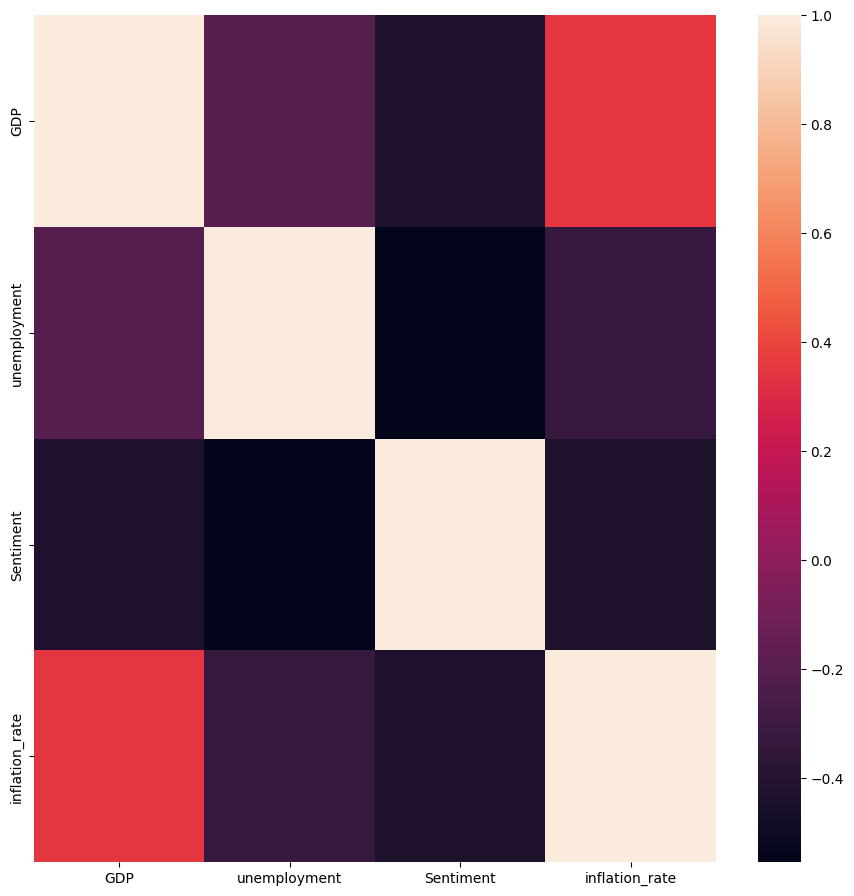

In [11]:
import seaborn as sns
X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])
corrmat = X_train_numeric.corr()
fig, ax = plt.subplots()    
fig.set_size_inches(11,11)  
sns.heatmap(corrmat)

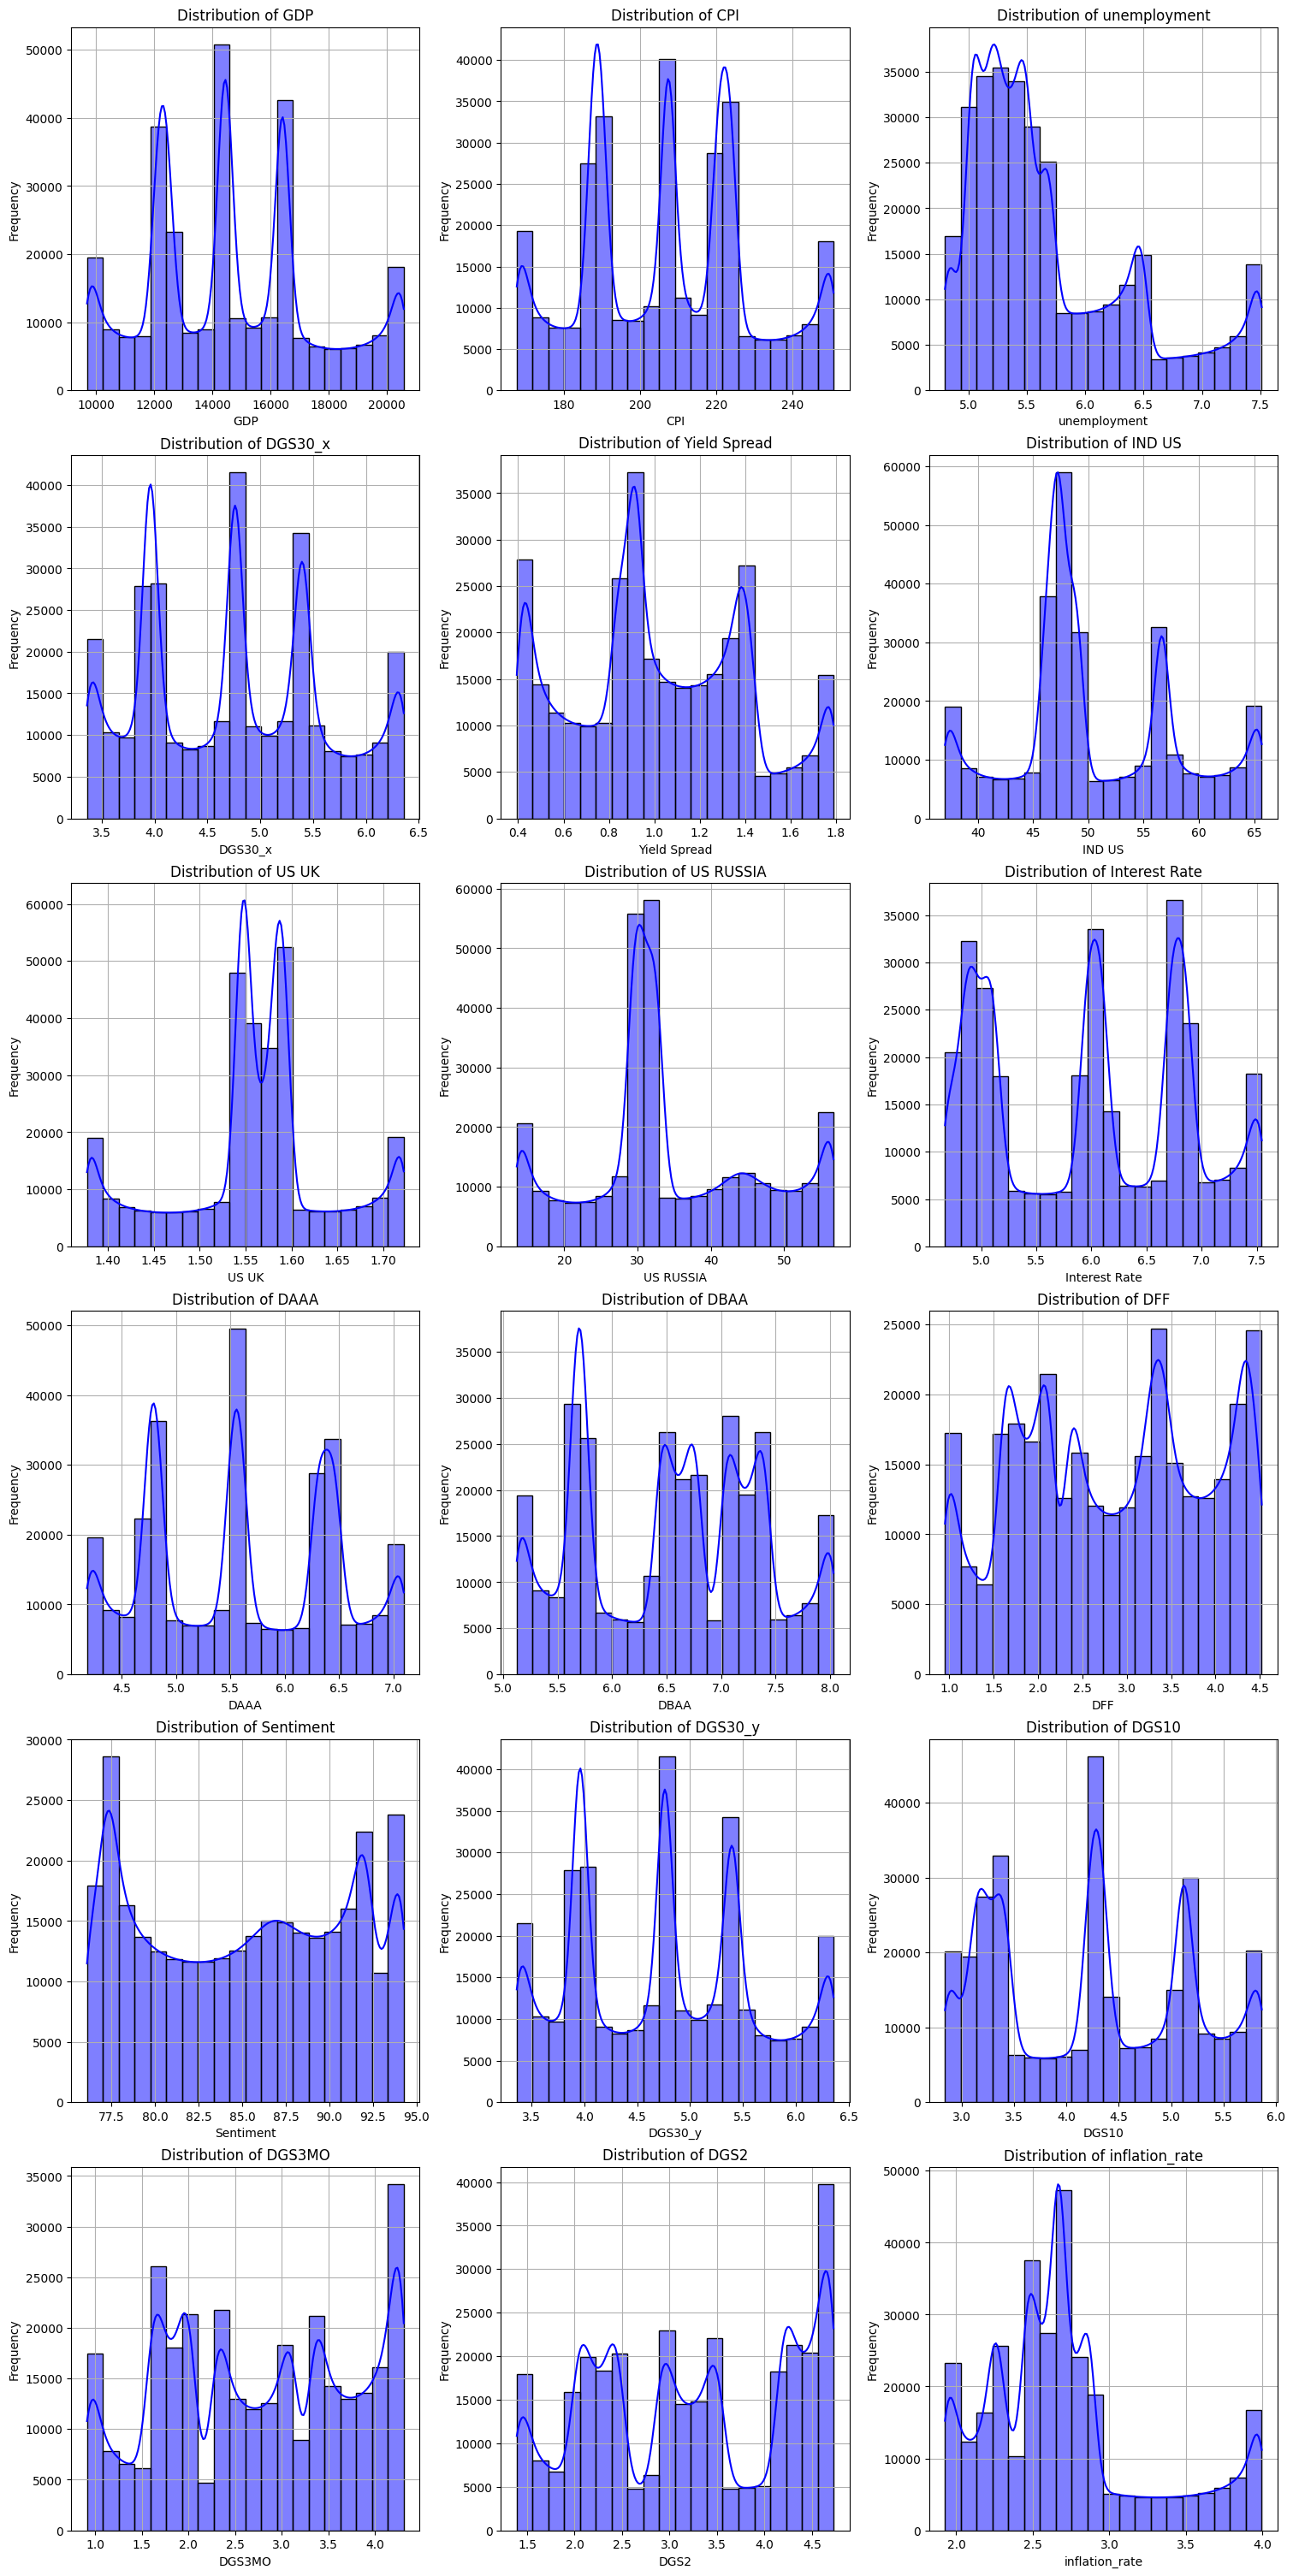

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("..//final//us_market_data_hourly_with_inflation_modified.csv")
# Select numeric columns
numeric_columns = df.select_dtypes(include='number').columns

# Number of rows and columns for subplots
num_cols = len(numeric_columns)
num_rows = (num_cols + 2) // 3  # Adjust rows dynamically for better fit (3 plots per row)

# Set up the figure
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows), constrained_layout=True)

# Flatten axes array for easy indexing
axes = axes.flatten()

# Plot histogram for each column
for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], ax=axes[i], kde=True, color='blue', bins=20)
    axes[i].set_title(f'Distribution of {column}', fontsize=12)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency') # done with frequency
    axes[i].grid(True)

# Hide unused subplots if columns are fewer than total subplot spaces
for j in range(len(numeric_columns), len(axes)):
    axes[j].set_visible(False)

# Show the plots
plt.show()

C:\Users\aksha\AppData\Local\Temp\ipykernel_5800\3290516918.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\aksha\AppData\Local\Temp\ipykernel_5800\3290516918.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\aksha\AppData\Local\Temp\ipykernel_5800\3290516918.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\aksha\AppData\Local\Temp\ipykernel_5800\3290516918.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` 

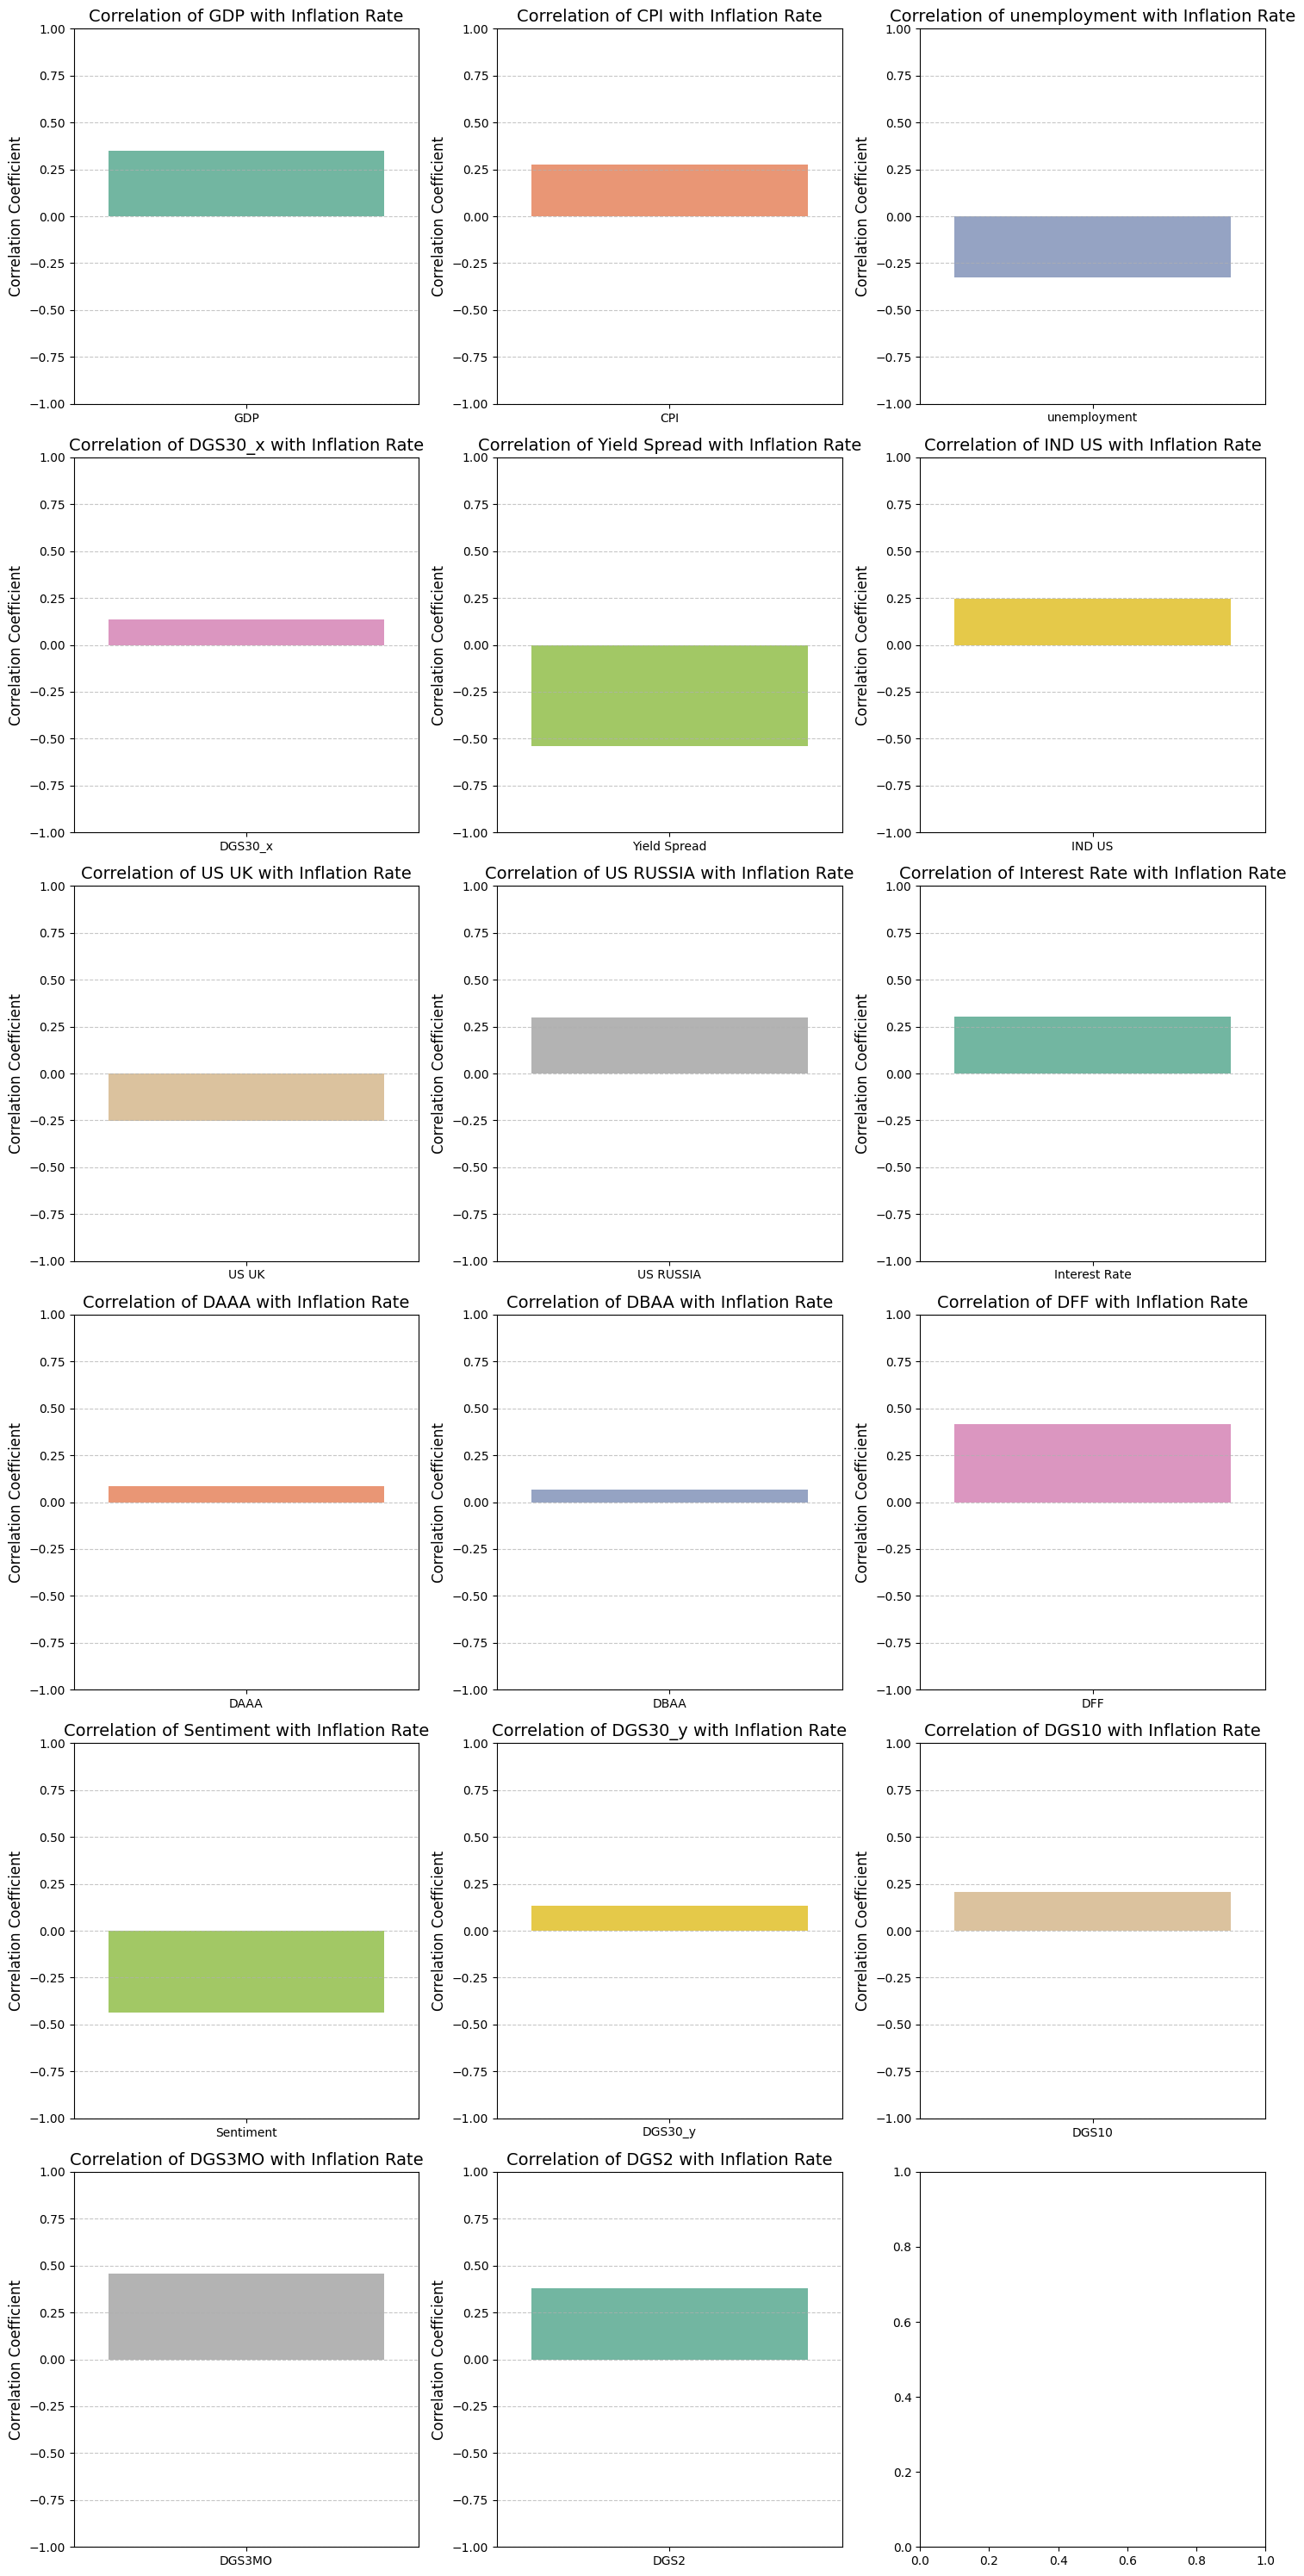

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
df_numeric=df.select_dtypes(include=['float64', 'int64'])   
correlation_matrix = df_numeric.corr()

# Extract correlations with respect to 'inflation_rate'
inflation_correlation = correlation_matrix['inflation_rate']

# Ensure 'DGS2' is part of the columns we're plotting
#if 'DGS2' not in inflation_correlation.index:
#print("DGS2 is not present in the correlation matrix.")

# Create a figure with subplots, excluding the last subplot if the total number of plots isn't a perfect fit
num_plots = len(inflation_correlation)   # Exclude 'inflation_rate' itself
num_rows = (num_plots // 3) + (1 if num_plots % 3 else 0)  # Number of rows in the subplot grid
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))  # 3 columns for subplots

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Custom color palette for each plot
colors = sns.color_palette("Set2", num_plots)  # Using 'Set2' palette with as many colors as needed

# Plot each correlation separately, skipping the last subplot
for i, column in enumerate(inflation_correlation.index):
    if column != 'inflation_rate':  # Skip plotting correlation of inflation_rate with itself
        if i < num_plots - 1:  # Avoid the last plot
            sns.barplot(
                x=[column], 
                y=[inflation_correlation[column]], 
                palette=[colors[i]],  # Apply a different color for each plot
                ax=axes[i]
            )
            axes[i].set_title(f'Correlation of {column} with Inflation Rate', fontsize=14)
            axes[i].set_ylabel('Correlation Coefficient', fontsize=12)
            axes[i].set_ylim(-1, 1)  # Correlation range is from -1 to 1
            axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Remove the last unused plot (if there's one)
if num_plots % 3 != 0:
    for j in range(num_plots, len(axes)):
        fig.delaxes(axes[j])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_curve, accuracy_score, f1_score, average_precision_score, auc
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Risk_Flag' is the target column
target_column = 'inflation_rate'

# Extract features and target variable
X = df.drop(target_column, axis=1)
y = df[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])
#X_test_numeric = X_test.select_dtypes(include=['float64', 'int64'])

# Standardize the data if needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create Random Forest classifier model
rm_cf = RandomForestClassifier(random_state=5, criterion='gini', bootstrap=True)
smote_sampler = SMOTE(random_state=30)
pipeline = Pipeline(steps=[('smote', smote_sampler), ('classifier', rm_cf)])

# Train the model
pipeline.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_proba = pipeline.predict_proba(X_test_scaled)[:, 1]
y_pred = pipeline.predict(X_test_scaled)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy*100:.2f}%")

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# Compute AUC-PR
auc_pr = auc(recall, precision)


# Plot Precision-Recall curve with thick borders
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', linewidth=3,  label=f'$\mathbf{{Precision-Recall\ curve\ (AUC\ =\ {auc_pr:.2f})}}$')
plt.xlabel('Recall', fontsize=16, fontweight='bold')
plt.ylabel('Precision', fontsize=16, fontweight='bold')
plt.title('Precision-Recall Curve', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)

# Make the axes' borders thicker
ax = plt.gca()
ax.spines['top'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)

# Make the tick labels bold and set their font size to match the title
ax.tick_params(axis='both', which='major', labelsize=16, width=2)
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')

plt.show()



# Calculate weighted F1-score
weighted_f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate Average Precision (AP)
average_precision = average_precision_score(y_test, y_pred_proba)

print(f"Weighted F1-Score: {weighted_f1:.4f}")
print(f"AUC-PR Score: {auc_pr:.4f}")
print(f"Average Precision (AP): {average_precision:.4f}")

<>:53: SyntaxWarning: invalid escape sequence '\m'
<>:53: SyntaxWarning: invalid escape sequence '\ '
<>:53: SyntaxWarning: invalid escape sequence '\m'
<>:53: SyntaxWarning: invalid escape sequence '\ '
C:\Users\aksha\AppData\Local\Temp\ipykernel_5800\1965581296.py:53: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(recall, precision, color='b', linewidth=3,  label=f'$\mathbf{{Precision-Recall\ curve\ (AUC\ =\ {auc_pr:.2f})}}$')
C:\Users\aksha\AppData\Local\Temp\ipykernel_5800\1965581296.py:53: SyntaxWarning: invalid escape sequence '\ '
  plt.plot(recall, precision, color='b', linewidth=3,  label=f'$\mathbf{{Precision-Recall\ curve\ (AUC\ =\ {auc_pr:.2f})}}$')


ValueError: could not convert string to float: '2015-04-05 00:00:00'

keeping inflation_rate on xaxis common(practise)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get all numeric columns except inflation_rate
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
columns_to_plot = [col for col in numeric_columns if col != 'inflation_rate']

cols = 2  # Number of columns in the subplot grid
rows = (len(columns_to_plot) + 1) // cols  # Calculate needed rows

fig, axes = plt.subplots(rows, cols, figsize=(12, 4*rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for idx, column in enumerate(columns_to_plot):
    sns.histplot(
        data=df,
        x='inflation_rate',
        weights=df[column],  # Use the actual column values for weights
        bins=30,
        kde=True,
        ax=axes[idx]  # Use the correct subplot axis
    )
    axes[idx].set_title(f'Distribution of Inflation Rate Weighted by {column}')
    axes[idx].set_xlabel('Inflation Rate')
    axes[idx].set_ylabel(column)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

NameError: name 'df' is not defined